<a href="https://colab.research.google.com/github/fionisarnen/without-LL-churn-prediction/blob/master/without_LL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supported Library**

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
import numpy as np

Using TensorFlow backend.


In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import plot_model
from copy import deepcopy
from keras.models import Model
from keras import backend as K
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from time import time
from keras.callbacks import TensorBoard
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
from google.colab import files
upload = files.upload()

Saving bigml_59c28831336c6604c800002a.csv to bigml_59c28831336c6604c800002a.csv
Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


# Keras Model

**Define** **Network-**This implementation using the NN library from Keras with two hidden layers with every 100 neurons. First, hidden layer using ReLU. ReLU is used to produce lighter networks and most likely match for inner layers. The second hidden layer is using Sigmoid. The output produce by this activation function is very suitable for the binary classification. Sigmoid most likely use in the outermost layer.

In [5]:
def create_model():
  model = Sequential()
  model.add(Dense(100,input_dim = 19,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  return model

Early stopping used to show clearly that sequential training perform so bad and show no indication of recovery

In [6]:
def train_model(xx,yy,model,validation,verbose=1,epochs=20,loss="binary_crossentropy"):
  opt = optimizers.Adam(lr=0.00001)
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
  model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['acc'])
  history = model.fit(xx,yy,epochs=epochs,batch_size=32,verbose=verbose,validation_data=validation,callbacks=[es])
  return model,history

# Dataset import

## Task 1
In this implementation we don't need a lot of compex preprocessing step. The simplest that needed are dropping unique feature (as it won't do any favor in learning) and encoding categorical features. This process implement on both dataset

In [10]:
#Load dataset.csv for task 1 from drive
task1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
task1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Comparison of each class. Churn shown as **minority**

In [11]:
churn_yes = (task1['Churn'] == 'Yes').sum()
churn_no = (task1['Churn'] == 'No').sum()
labels = ['Churn Rate', 'Retention Rate']
values = [churn_yes, churn_no]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textfont_size=18)
fig.update_layout(title='Churn Rate - Old Task',)

fig.show()

In [8]:
#Encode Categorical
new = task1.columns.tolist()
le = LabelEncoder()
task1[new] = task1[new].apply(lambda col: le.fit_transform(col))
##
data1 = task1[new].drop(['customerID'], axis = 1) 
newdata = deepcopy(data1)

In [9]:
#separating data and label class
target = newdata['Churn']
#feature data
data = newdata.drop(columns=['Churn'])
#cast it as input for our model
xA = data
yA = target

In [12]:
#input for nn
x = data
y = target

## Task 2

In [13]:
#Load dataset.csv for task 2 from drive
task2 = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
task2.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Comparison of each class. Churn shown as **minority**

In [14]:
churn_yes = (task2['churn'] == 1).sum()
churn_no = (task2['churn'] == 0).sum()

labels = ['Churn Rate', 'Retention Rate']
values = [churn_yes, churn_no]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_traces(textfont_size=18)
fig.update_layout(title='Churn Rate - New Task',)

fig.show()

In [15]:
#Encode Categorical
new = task2.columns.tolist()
le = LabelEncoder()
task2[new] = task2[new].apply(lambda col: le.fit_transform(col))
data2 = task2[new].drop(['phone number'], axis = 1) 
newdata = deepcopy(data2)

In [16]:
#separating data and label class
target = newdata['churn']
#feature data
data = newdata.drop(columns=['churn'])
#cast it as input for our model
xB = data
yB = target

# Create and fit Model

In [17]:
model = create_model()
model,historyA = train_model(xA,yA,model,[xA,yA],epochs=50)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7043 samples, validate on 7043 samples
Epoch 1/50
7043/7043 [==============================] - 1s 101us/step - loss: 405.3469 - acc: 0.2678 - val_loss: 373.8449 - val_acc: 0.2681
Epoch 2/50
7043/7043 [==============================] - 0s 51us/step - loss: 342.8544 - acc: 0.2676 - val_loss: 311.5389 - val_acc: 0.2682
Epoch 3/50
7043/7043 [==============================] - 0s 52us/step - loss: 280.6018 - acc: 0.2685 - val_loss: 249.4150 - val_acc: 0.2693
Epoch 4/50
7043/7043 [==============================] - 0s 50us/step - loss: 218.7047 - acc: 0.2705 - val_loss: 187.4532 - val_acc: 0.2709
Epoch 5/50
7043/7043 [==============================] - 0s 50us/step - loss: 156.5539 - acc: 0.2725 - val_loss: 125.0501 - val_acc: 0.2745
Epoch 6/50
7043/7043 [==============================] - 0s 51us/step - loss: 95.

**Sequential Training**

1# Catastrophic Forgetting

Scenario : xA,yA as the previous task (Task 1) and
xB,yB as the new task (Task 2). What we want to focus:
1. the normal or 'traditional' sequential training vs dynamic sequential training
2. proof that ewc overcome fogetting while the traditional suffer from forgetting (also overfitting)

* here the model use Keras as the training system by training on new task while validating on previous task. The sign of quality performance shown by trainset (which on new task) and testset (on prev task)

In [18]:
model,historyB = train_model(xB,yB,model,[xA,yA],epochs=50)

Train on 3333 samples, validate on 7043 samples
Epoch 1/50
3333/3333 [==============================] - 0s 107us/step - loss: 32.0754 - acc: 0.7327 - val_loss: 1.5473 - val_acc: 0.4637
Epoch 2/50
3333/3333 [==============================] - 0s 73us/step - loss: 30.3853 - acc: 0.7381 - val_loss: 3.9275 - val_acc: 0.3585
Epoch 3/50
3333/3333 [==============================] - 0s 80us/step - loss: 28.7872 - acc: 0.7438 - val_loss: 7.2977 - val_acc: 0.3405
Epoch 4/50
3333/3333 [==============================] - 0s 73us/step - loss: 27.2694 - acc: 0.7486 - val_loss: 11.0434 - val_acc: 0.3276
Epoch 5/50
3333/3333 [==============================] - 0s 77us/step - loss: 25.7995 - acc: 0.7501 - val_loss: 15.5126 - val_acc: 0.3134
Epoch 6/50
3333/3333 [==============================] - 0s 74us/step - loss: 24.3457 - acc: 0.7528 - val_loss: 20.3857 - val_acc: 0.3064
Epoch 7/50
3333/3333 [==============================] - 0s 70us/step - loss: 22.8968 - acc: 0.7561 - val_loss: 24.8218 - val_acc: 0.

([6.141509889304513, 0.7860786318778992],
 [110.73053879570625, 0.2724691331386566],
 0.2832599878311157)

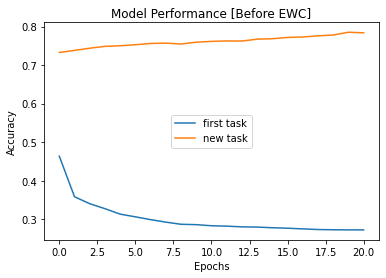

In [19]:
plt.plot(historyB.history["val_acc"])
plt.plot(historyB.history["acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['first task','new task'], loc='center')
plt.title("Model Performance [Before EWC]")
plt.savefig('image_before EWC.png', format='png', dpi=1200)
model.evaluate(xB,yB,verbose=0),model.evaluate(xA,yA,verbose=0),max(historyB.history["val_acc"][10:])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
